In [ ]:
Explore the bicycle counts on Seattle’s Fremont Bridge Data with respect to
i) Average daily bicycle counts 
ii) Average hourly bicycle counts by weekday and weekend

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)  

#index column is a time series object

data.columns = ['Total', 'East', 'West']
data.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_632\1582325263.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


           Total       East       West
Date                                  
0     128.942967  57.141598  71.801369
1     137.427155  61.175774  76.251381
2     136.576050  60.836447  75.739603
3     129.781730  58.179309  71.602420
4     117.590246  52.669803  64.920443
5      64.786742  32.339293  32.447449
6      62.538935  31.630508  30.908428


<AxesSubplot:>

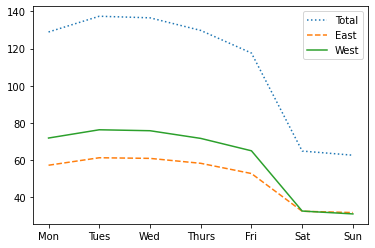

In [7]:
by_weekday = data.groupby(data.index.dayofweek).mean()
print(by_weekday)
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

['Weekday' 'Weekday' 'Weekday' ... 'Weekday' 'Weekday' 'Weekday']
                       Total        East        West
Weekday 00:00:00    9.192817    3.934074    5.258743
        01:00:00    4.555293    2.039698    2.515595
        02:00:00    3.034972    1.489130    1.545841
        03:00:00    2.602316    1.355860    1.246456
        04:00:00    7.428403    4.074669    3.353733
        05:00:00   32.180766   19.745747   12.435019
        06:00:00  115.899102   70.033554   45.865548
        07:00:00  295.413516  183.724008  111.689509
        08:00:00  412.670605  243.398866  169.271739
        09:00:00  224.206619  121.508747  102.697872
        10:00:00   98.592435   50.811584   47.780851
        11:00:00   76.071158   39.116785   36.954374
        12:00:00   79.582979   39.792908   39.790071
        13:00:00   86.116966   41.961248   44.155718
        14:00:00   97.841409   44.694398   53.147010
        15:00:00  140.192862   58.452848   81.740014
        16:00:00  268.633893   89

<AxesSubplot:title={'center':'Weekends'}, xlabel='time'>

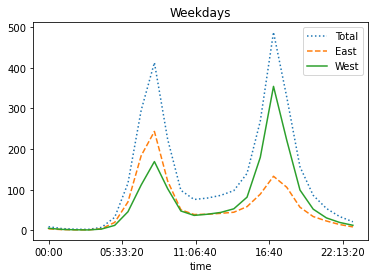

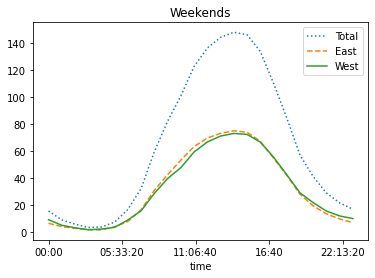

In [13]:
import numpy as np
weekend_array = np.where(data.index.dayofweek < 5, 'Weekday', 'Weekend')

print(weekend_array)
#dayofweek---> Monday =0 , Sunday = 6

by_time = data.groupby([weekend_array, data.index.time]).mean()


print(by_time)

by_time.loc['Weekday'].plot(title='Weekdays', style=[':', '--', '-'])
by_time.loc['Weekend'].plot(title='Weekends', style=[':', '--', '-'])


#fig, ax = plt.subplots(1, 2, figsize=(14, 5))
#by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', style=[':', '--', '-'])
#by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', style=[':', '--', '-'])